In [12]:
pip install --user googlemaps requests pandas numpy matplotlib openpyxl scikit-learn

  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 5.6 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.0 MB 5.4 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.0 MB 4.4 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.0 MB 4.1 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.0 MB 3.6 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.0 MB 3.3 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.0 MB 3.2 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.0 MB 3.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 3.0 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 3.1 MB/s eta 0:00:01
   ----------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [228]:
import pandas as pd

In [229]:
df = pd.read_csv('data/NYC_museums.csv')
df.head()

,the_geom,NAME,TEL,URL,ADRESS1,ADDRESS2,CITY,ZIP,FREE
0,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House,(212) 514-3700,http://www.oldnycustomhouse.gov/,1 Bowling Grn,NaN,New York,"10,004",False
1,POINT (-74.06303178855111 40.615120837755356),Alice Austen House Museum,(718) 816-4506,http://www.aliceausten.org/,2 Hylan Blvd,NaN,Staten Island,"10,305",False
2,POINT (-73.94729768541572 40.833853500753314),American Academy of Arts and Letters,(212) 368-5900,http://www.artsandletters.org/,633 W. 155th St.,NaN,New York,"10,032",False
3,POINT (-73.97810302110001 40.76162497138548),American Folk Art Museum,(212) 265-1040,http://www.folkartmuseum.org/,45 West 53rd Street,NaN,New York,"10,019",True
4,POINT (-74.0396848374904 40.69905626244391),American Immigration History Center,(212) 363-3200,http://www.ellisisland.org/,Ellis Island,NaN,New York,0,False


In [230]:
df.columns

Index(['the_geom', 'NAME', 'TEL', 'URL', 'ADRESS1', 'ADDRESS2', 'CITY', 'ZIP',
       'FREE'],
      dtype='object')

In [231]:
df.describe()

,the_geom,NAME,TEL,URL,ADRESS1,ADDRESS2,CITY,ZIP,FREE
count,130,130,128,130,130,15,130,130,130
unique,130,130,123,129,123,15,7,59,2
top,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House,(212) 514-3700,http://www.ellisisland.org/,15 W. 16th St.,11th Floor,New York,"10,011",False
freq,1,1,2,2,6,1,89,9,124


In [232]:
# Only need name and location
cols = [
    "the_geom",
    "NAME"
]

df = df[cols].dropna()
df.head()

,the_geom,NAME
0,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House
1,POINT (-74.06303178855111 40.615120837755356),Alice Austen House Museum
2,POINT (-73.94729768541572 40.833853500753314),American Academy of Arts and Letters
3,POINT (-73.97810302110001 40.76162497138548),American Folk Art Museum
4,POINT (-74.0396848374904 40.69905626244391),American Immigration History Center


In [233]:
df.describe()

,the_geom,NAME
count,130,130
unique,130,130
top,POINT (-74.01375579519738 40.703816216918035),Alexander Hamilton U.S. Custom House
freq,1,1


In [234]:
df = df.rename(columns={
    "NAME": "name",
    "ADDRESS2": "address",
    "FREE": "free",
})

In [235]:
coords = (
    df["the_geom"]
    .str.replace("POINT (", "", regex=False)
    .str.replace(")", "", regex=False)
    .str.split(" ", expand=True)
)

df["lon"] = coords[0].astype(float)
df["lat"] = coords[1].astype(float)

df[["lat", "lon"]].head()

,lat,lon
0,40.703816,-74.013756
1,40.615121,-74.063032
2,40.833854,-73.947298
3,40.761625,-73.978103
4,40.699056,-74.039685


In [236]:
df = df.drop(columns=["the_geom"])

In [237]:
df["indoor"] = True
df["museum"] = True
df

,name,lon,lat,indoor,museum
0,Alexander Hamilton U.S. Custom House,-74.013756,40.703816,True,True
1,Alice Austen House Museum,-74.063032,40.615121,True,True
2,American Academy of Arts and Letters,-73.947298,40.833854,True,True
3,American Folk Art Museum,-73.978103,40.761625,True,True
4,American Immigration History Center,-74.039685,40.699056,True,True
...,...,...,...,...,...
125,American Sephardi Federation / Sephardic House,-73.993886,40.738077,True,True
126,YIVO Institute for Jewish Research,-73.993794,40.737960,True,True
127,American Jewish Historical Society,-73.993929,40.738015,True,True
128,Yeshiva University Museum,-73.993817,40.738046,True,True


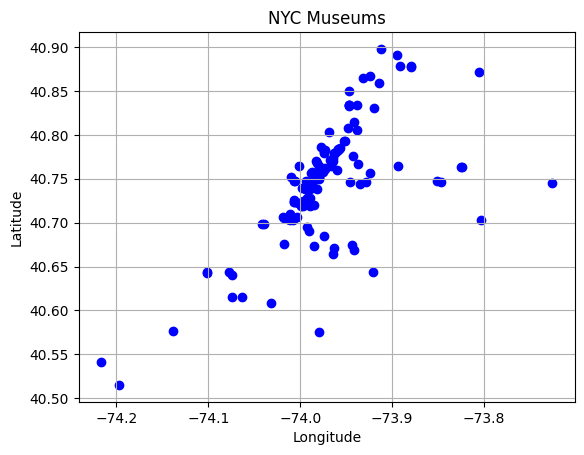

In [238]:
import matplotlib.pyplot as plt

plt.scatter(df["lon"], df["lat"], c='blue', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Museums')
plt.grid()
plt.show()

In [ ]:
start_lat = input("Enter your starting address latitude: ")
start_lon = input("Enter your starting address longitude: ")

In [ ]:
end_lat = input("Enter your ending address latitude: ")
end_lon = input("Enter your ending address longitude: ")

In [239]:
num_locations = 3

In [240]:
start_lat = 40.7095
start_lon = -74.0145

end_lat = 40.7424
end_lon = -74.0061

In [241]:
data = {"name": ["start", "end"], "lat": [float(start_lat), float(end_lat)], "lon": [float(start_lon), float(end_lon)]}
df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)

In [242]:
start_idx = df.index[(df["name"] == "start")][0]
print(start_idx)
end_idx = df.index[df["name"] == "end"][0]
print(end_idx)

130
131


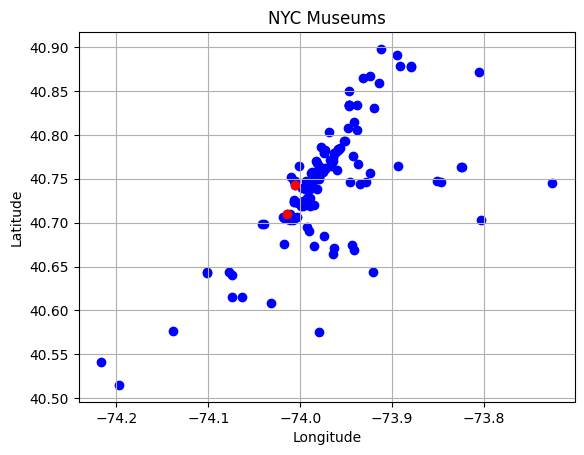

In [243]:
plt.figure()
plt.scatter(df["lon"], df["lat"], c='blue', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Museums')
plt.scatter(df["lon"].iloc[start_idx], df["lat"].iloc[start_idx], c='red', marker='o')
plt.scatter(df["lon"].iloc[end_idx], df["lat"].iloc[end_idx], c='red', marker='o')
plt.grid()
plt.show()


In [244]:
# want to look at closest 10 points
from sklearn.neighbors import BallTree
import numpy as np

coords = np.radians(df[["lat", "lon"]].values)
tree = BallTree(coords, metric = "haversine")

# Find nearest 10 neighbors
dist, ind = tree.query(coords, k=10)


In [245]:
dist = dist * 6371.2 # Convert to kilometers

In [246]:
transport = "walk"

In [247]:
if transport == "walk":
    # Apply walking speed (5 km/h) to convert distance to time
    time = dist / 5  # Time in hours
else:
    # Apply driving speed (50 km/h) to convert distance to time
    time = dist / 50  # Time in hours

In [248]:
def haversine_dist(lat1, lon1, lat2, lon2):
    R = 6371.2
    lat1, lon1 = np.radians(lat1), np.radians(lon1)
    lat2, lon2 = np.radians(lat2), np.radians(lon2)

    dlat = lat2-lat1
    dlon = lon2-lon1

    havc = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    d = 2 * R * np.arcsin(np.sqrt(havc))
    return d

In [249]:
# greedy approach, take closest point to each starting from start point
def greedy_alg(df, start_idx, end_idx, num_locations):
    visited = [start_idx, end_idx]
    itinerary = [start_idx]
    current_idx = start_idx
    total_dist = 0

    for _ in range(num_locations):
        next_dists = haversine_dist(
            df.loc[current_idx, "lat"], df.loc[current_idx, "lon"],
            df["lat"].values, df["lon"].values
        )
        next_dists[list(visited)] = np.inf  # Ignore already visited locations
        next_idx = np.argmin(next_dists)
        total_dist += next_dists[next_idx]
        itinerary.append(next_idx)
        visited.append(next_idx)
        current_idx = next_idx

    itinerary.append(end_idx)
    total_dist += haversine_dist(
        df.loc[current_idx, "lat"], df.loc[current_idx, "lon"],
        end_lat, end_lon
    )
    return itinerary, total_dist

In [250]:
ny_itinerary, total_dist = greedy_alg(df, start_idx, end_idx, num_locations)

In [251]:
print(ny_itinerary)
full_itinerary = df.iloc[ny_itinerary]["name"]
print(full_itinerary)
print("Total distance (km):", total_dist)

[np.int64(130), np.int64(80), np.int64(66), np.int64(84), np.int64(131)]
130                                                start
80     National September 11 Memorial & Museum at the...
66                            Museum of American Finance
84                           New York City Police Museum
131                                                  end
Name: name, dtype: object
Total distance (km): 5.362389604362357


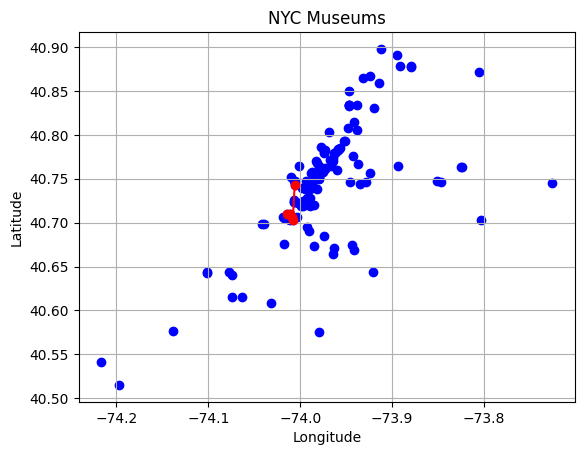

In [252]:
plt.scatter(df["lon"], df["lat"], c='blue', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Museums')
plt.plot(df["lon"].iloc[ny_itinerary], df["lat"].iloc[ny_itinerary], c='red', marker='o')
plt.grid()
plt.show()

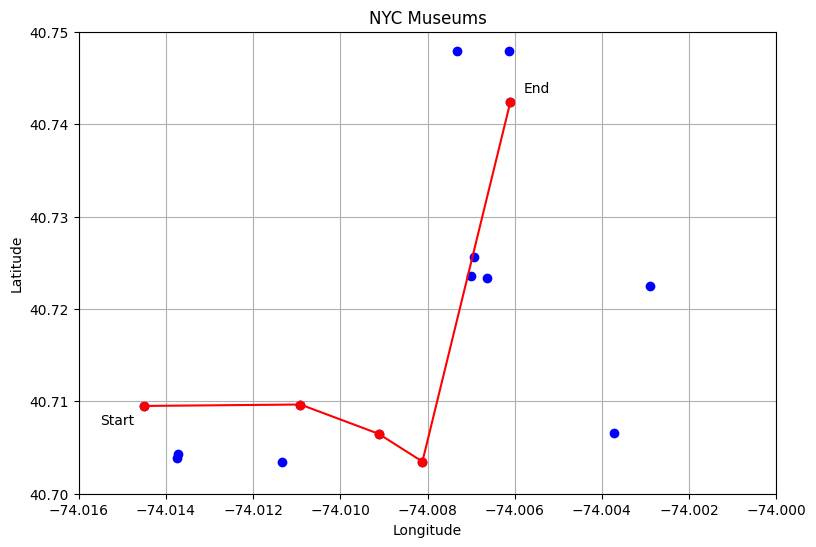

In [253]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["lon"], df["lat"], c='blue', marker='o')
plt.xlim(-74.016, -74.0)
plt.ylim(40.7, 40.75)
plt.plot(df["lon"].iloc[ny_itinerary], df["lat"].iloc[ny_itinerary], c='red', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["lon"].iloc[start_idx]-0.0001, df["lat"].iloc[start_idx]), xytext=(df["lon"].iloc[start_idx]-0.001, df["lat"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["lon"].iloc[end_idx]+0.0001, df["lat"].iloc[end_idx]), xytext=(df["lon"].iloc[end_idx]+0.0003, df["lat"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

So not necessarily the best path - there are a few more museums they could reach that would seem more optimal

In [254]:
print(ind[start_idx])
closest = ind[start_idx]

[130  80 105  73  66  79   0  33  84 108]


In [255]:
print(dist[start_idx])

[0.         0.30261626 0.49944877 0.52080827 0.56388786 0.57954229
 0.63513336 0.72883584 0.85896735 0.96400479]


In [256]:
print(df.iloc[80])

name      National September 11 Memorial & Museum at the...
lon                                              -74.010916
lat                                               40.709654
indoor                                                 True
museum                                                 True
Name: 80, dtype: object


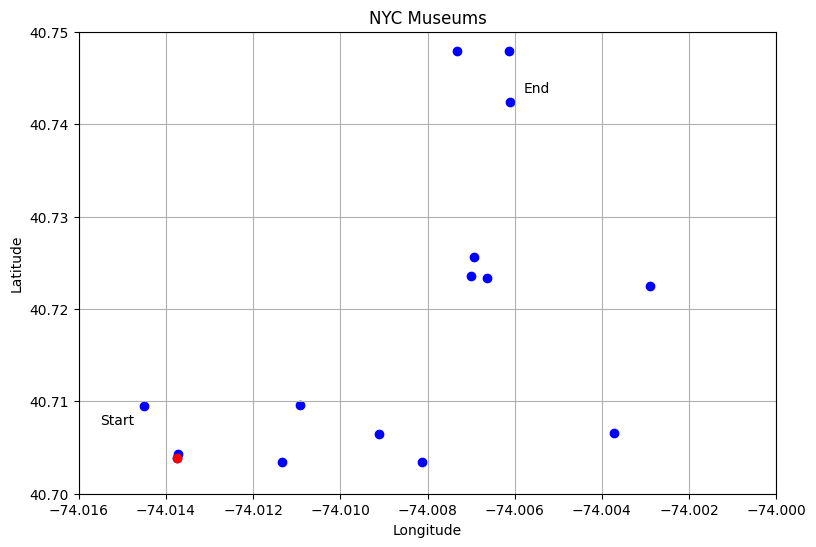

In [257]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["lon"], df["lat"], c='blue', marker='o')
plt.xlim(-74.016, -74.0)
plt.ylim(40.7, 40.75)
plt.scatter(df["lon"].iloc[closest[6]], df["lat"].iloc[closest[6]], c='red', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["lon"].iloc[start_idx]-0.0001, df["lat"].iloc[start_idx]), xytext=(df["lon"].iloc[start_idx]-0.001, df["lat"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["lon"].iloc[end_idx]+0.0001, df["lat"].iloc[end_idx]), xytext=(df["lon"].iloc[end_idx]+0.0003, df["lat"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

In [266]:
# can try using beam search
def beam_search(df, start_idx, end_idx, num_locations, beam_width=5):
    beams = [([start_idx], 0)]

    for _ in range(num_locations):
        new_beams = []
        for itinerary, cost in beams:
            current = itinerary[-1]
            unused = set(df.index) - set(itinerary) - {end_idx}
            for nxt in unused:
                dist = haversine_dist(
                    df.loc[current,"lat"], df.loc[current,"lon"],
                    df.loc[nxt,"lat"], df.loc[nxt,"lon"]
                )
                new_beams.append((itinerary+[nxt], cost+dist))

        beams = sorted(new_beams, key=lambda x: x[1])[:beam_width]
    total = []
    for itinerary, cost in beams:
        last = itinerary[-1]
        end = haversine_dist(
        df.loc[last, "lat"], df.loc[last, "lon"],
        end_lat, end_lon
    )
        total.append((itinerary+[end_idx], cost + end))

    best_itinerary, best_cost = min(total, key = lambda x: x[1])
    return best_itinerary, best_cost
        

In [268]:
itinerary, distance = beam_search(df, start_idx, end_idx, num_locations, beam_width=5)

In [271]:
print(itinerary)
full_itinerary = df.iloc[itinerary]["name"]
print(full_itinerary)
print(distance)

[np.int64(130), 79, 0, 33, np.int64(131)]
130                                     start
79     National Museum of the American Indian
0        Alexander Hamilton U.S. Custom House
33                     Fraunces Tavern Museum
131                                       end
Name: name, dtype: object
5.203911665150817


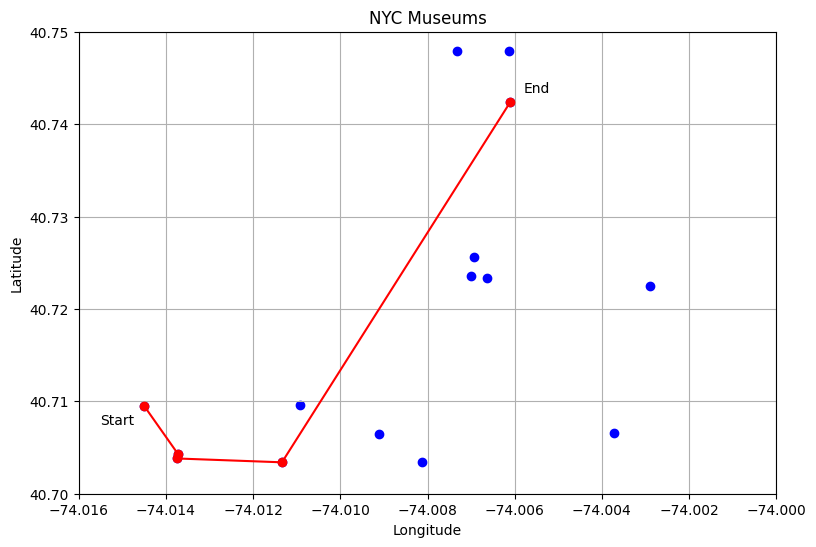

In [272]:
fig, ax = plt.subplots(figsize = (9,6))
plt.scatter(df["lon"], df["lat"], c='blue', marker='o')
plt.xlim(-74.016, -74.0)
plt.ylim(40.7, 40.75)
plt.plot(df["lon"].iloc[itinerary], df["lat"].iloc[itinerary], c='red', marker='o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Museums')
ax.annotate('Start', xy=(df["lon"].iloc[start_idx]-0.0001, df["lat"].iloc[start_idx]), xytext=(df["lon"].iloc[start_idx]-0.001, df["lat"].iloc[start_idx]-0.002))
ax.annotate('End', xy=(df["lon"].iloc[end_idx]+0.0001, df["lat"].iloc[end_idx]), xytext=(df["lon"].iloc[end_idx]+0.0003, df["lat"].iloc[end_idx]+0.001))
plt.grid()
plt.show()

5.2039 is even more optimized than the other distance

In [273]:
# want to implement one greedy algorithm based on directions